11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training the model...

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - accuracy: 0.9016 - loss: 0.3194 - val_accuracy: 0.9823 - val_loss: 0.0548
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9848 - loss: 0.0510 - val_accuracy: 0.9858 - val_loss: 0.0397
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9895 - loss: 0.0335 - val_accuracy: 0.9889 - val_loss: 0.0302
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9918 - loss: 0.0249 - val_accuracy: 0.9908 - val_loss: 0.0289
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 27ms/step - accuracy: 0.9939 - loss: 0.0190 - val_accuracy: 0.9918 - val_loss: 0.0240
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9906 - loss: 0.0284

✅ Test Accuracy: 0.9918
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


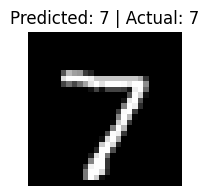

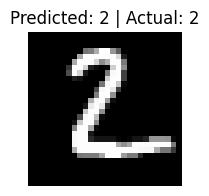

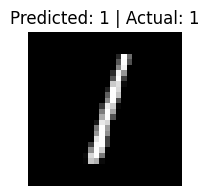

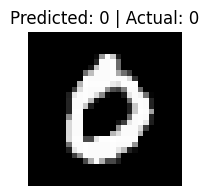

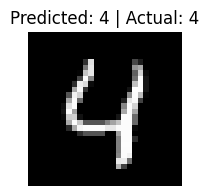

In [1]:
# ✅ Ensure plots render inside Colab
%matplotlib inline

# ✅ Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# ✅ Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# ✅ Normalize pixel values (0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# ✅ Reshape for CNN input (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# ✅ Build CNN model (clean, no warnings)
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# ✅ Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Train the model
print("Training the model...\n")
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# ✅ Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# ✅ Make predictions
predictions = model.predict(x_test)

# ✅ Show 5 predicted digits with actual values
for i in range(5):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])} | Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()
